# Homework 5 

Note: I spent more than 10 hours on this homework, specifically, the curve of growth code probably took me a day since my prelimery code took around 20 minutes to run. I understand some of my explanations could have been better but I just invested much more time on this homework than I assumed to.

In [35]:
m_p = 1.67e-24
m_e = 9.1e-28
c = 3e10
k = 1.38e-16

## Ques 1

A Voigt profile is a convolution of Gaussian and a Lorentzian profiles.In voigt profile, the contribution of the Lorentz profile is strongest in the wings and the Gaussian dominates the shape of the profile at the core. Mathematically we define voigt profile as:
<p> $\phi = 1/\sqrt(\pi) \cdot 1/\nu \cdot c/b \cdot H(a,u)$
<p> where $H(a,u)= a/\pi \int_{-\infty}^{\infty} \frac{e^{-y^2} dy}{(u-y)^2 + a^2}$
<p> $a = \frac{\gamma c}{4 \pi \nu b}$ and $u=\nu/b$



## Ques 2

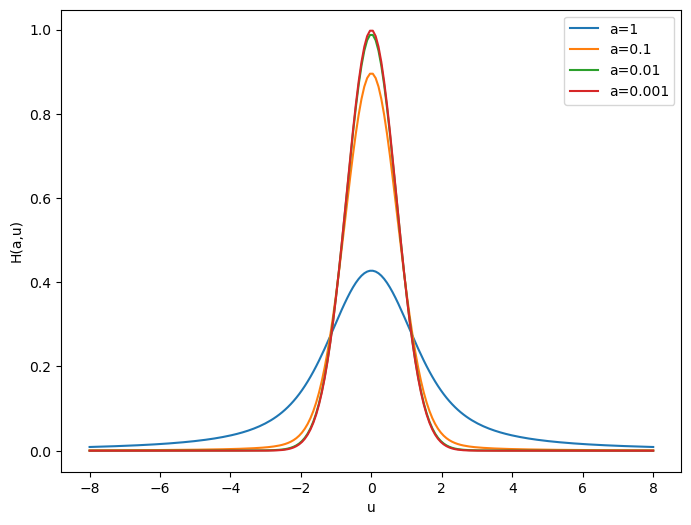

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad 

def integrate(y,u,a):
    return a/np.pi * np.exp(-y**2)/(a**2 +(u-y)**2)

def func(u,a):
    result = []
    for x in u:
        result.append(quad(integrate,-np.inf,np.inf,args=(x,a))[0])
    result=np.array(result)
    return result

u = np.linspace(-8,8,200)

plt.figure(figsize=(8,6))
plt.plot(u,func(u,1),label='a=1')
plt.plot(u,func(u,0.1),label='a=0.1')
plt.plot(u,func(u,0.01),label='a=0.01')
plt.plot(u,func(u,0.001),label='a=0.001')
plt.xlabel('u')
plt.ylabel('H(a,u)')
plt.legend()
plt.show()


## Ques 3

'a' is the ratio of intrinsic (lorentz) broadening to thermal broadening. Large 'a' (which means a>=1) value implies lorentz profile will dominate and the plot profile is wide and shallow. For small 'a' value, the profile will be dominated by gaussian profile which is narrow and peak value is higher.

## Ques 4

<p> The expression for a is given by: $a = \frac{A \cdot c}{4 \cdot \pi \cdot b \cdot \nu}$
<p> since $c = \nu \lambda$
<p> a = $\frac{A \cdot \lambda}{4 \cdot \pi \cdot b}$
<p> where $b = \sqrt{\frac{2 \cdot k \cdot T}{m}} $

In [3]:
A_lya = 4.7e8
A_21 = 2.88e-15
A_cii = 2.5e8
T=100

b_H = np.sqrt(2*k*T/m_p)
b_C = np.sqrt(2*k*T/12*m_p) #  cii mass = 12 * m_H

a_lya = (A_lya * 1216*1e-8)/(4*np.pi*b_H)
a_21 = (A_21 * 21)/(4*np.pi*b_H)
a_CII = (A_cii * 1334*1e-8)/(4*np.pi*b_C)



print('The a value for LyA is a_lyA= '+'{0:.5e}'.format(a_lya))
print('The a value for 21cm is a_lyA= '+'{0:.5e}'.format(a_21))
print('The a value for CII is a_CII= '+'{0:.5e}'.format(a_CII))

The a value for LyA is a_lyA= 3.53773e-03
The a value for 21cm is a_lyA= 3.74374e-20
The a value for CII is a_CII= 4.28217e+21


## Ques 5

For this analysis, I made a wavelength array and then converted it into velocity array $v=c*\delta \lambda / \lambda$ . Then I used it in the unitless term for voigt profile.


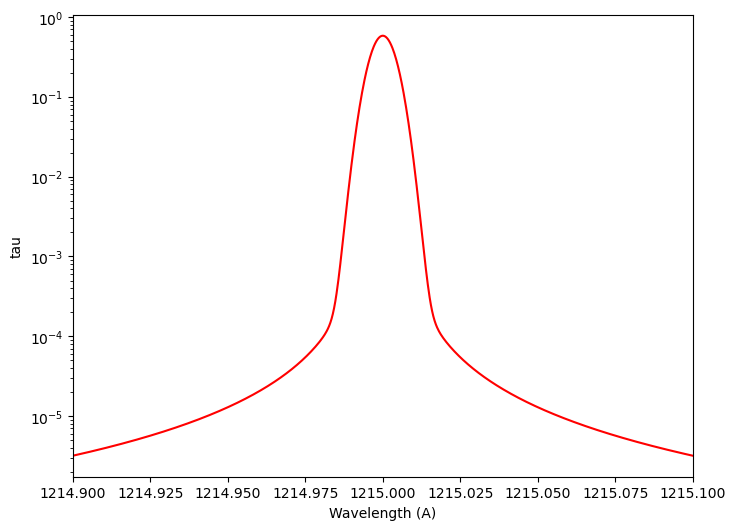

In [21]:
lyman_alpha = np.linspace(1214.9,1215.1,num=1000)
l0 = 1215
v = c*(lyman_alpha-l0)/l0
u=v/b_H

def voigt(u,a,nu,b):
    return (np.pi**-0.5)*(1/nu) * (c/b) * func(u,a)

plt.figure(figsize=(8,6))
N_l=1e12


tau = 0.58 * (b_H/1.3e5)**(-1) * (N_l/1e12) * func(u,a_lya)
plt.plot(lyman_alpha,tau,color='r')
    
plt.xlabel('Wavelength (A)')
plt.ylabel('tau')
plt.yscale('log')
plt.xlim(1214.9,1215.1)

plt.show()

## Ques 6

I have made this code in a way that we can find maximum value of optical depth such that H(a,u) = 1/tau_0 where tau_0 is maximum optical depth. then I figured out which value ans range of N_l would be the best to integrate to get the curve of growth.

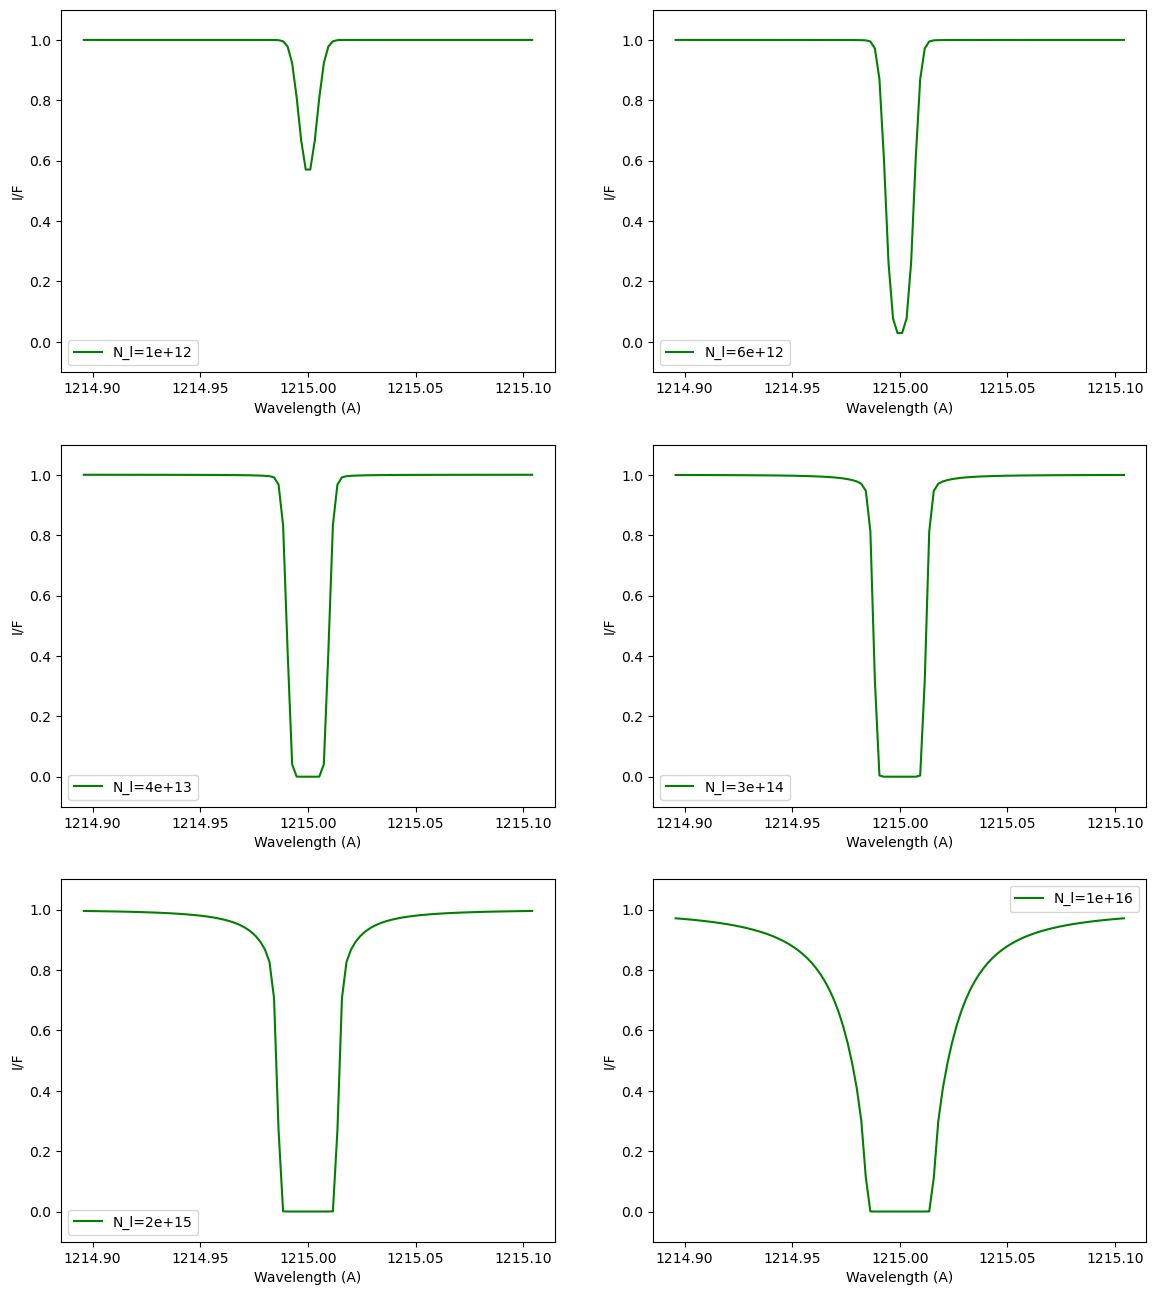

In [37]:
l0=1215

c = 3e10

plt.figure(figsize=(14,16))

N_l_array = np.logspace(12,16,num=6)

u_array = np.logspace(-1,5,num=1000)

i=0
for N_l in N_l_array:
    tau_0 = 0.58*(b_H/1.3e5)**(-1) * (N_l/1e12) * func([0],a_lya)[0]
    if(1/tau_0 > 1e-4):
        u_lim = 4
    else:
        index, = np.where(func(u_array,a_lya) < 1/(tau_0))
        u_lim = u_array[index[0]]
        
        
    l_lim = u_lim*b_H/c*l0

    l = np.linspace(l0 - 5*l_lim, l0+5*l_lim,num=100)
    v = c*(l-l0)/l0
    u = v/b_H
    
    plt.subplot(3,2,i+1)
    
    F = np.array([1]*len(l))
    
    tau = 0.58*(b_H/1.3e5)**(-1) * (N_l/1e12) * func(u,a_lya)
    I = F*np.exp(-1*tau)
    
    plt.plot(l, I ,color = 'g',label='N_l=' +'{0:.0e}'.format(N_l))
    plt.xlabel('Wavelength (A)')
    plt.ylim(-0.1,1.1)
    
    plt.ylabel('I/F')
    plt.legend()
    i+=1
    
    
    


## Ques 7

The equivalent width is equal to the area between the line and the continuum. To explain using figure, equivalent width stretches vertically from zero intensity to the continuum intensity and has the same area as the line.



In [43]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/equivalent_width.gif")

credit: https://astronomy.swin.edu.au/cosmos/e/equivalent+width

## Ques 8

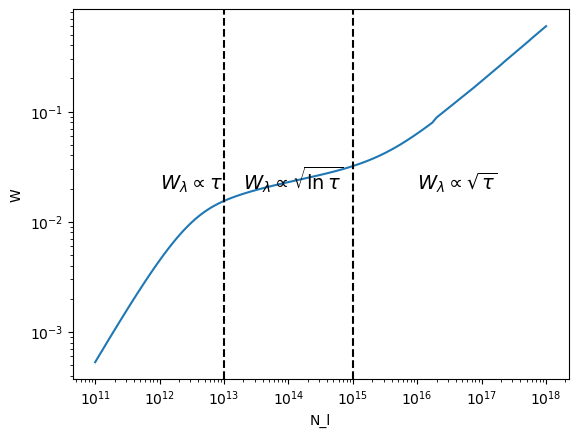

In [81]:
l0=1215

u_array = np.logspace(1,4,num=100)

W_lam_array = []
tau_array=[]

c = 3e10



N_l_array = np.logspace(11,18,num=100)



i=0
for N_l in N_l_array:
    tau_0 = 0.58 * (1.3e5/b_H) * (N_l/1e12) * func([0],a_lya)
    if(1/(tau_0) > 1e-4):
        u_lim = 4
    else:
        index, = np.where(func(u_array,a_lya) < 1/(tau_0))
        u_lim = u_array[index[0]]
        
        
    l_lim = u_lim*b_H/c*l0

    l = np.linspace(l0 - 10*l_lim, l0+10*l_lim, num=1000)
    v = c*(l-l0)/l0
    u = v/b_H
    
    tau = 0.58 * (1.3e5/b_H) * (N_l/1e12) * func(u,a_lya)
    tau_array.append(tau_0)
    
    d = l[1]-l[0]
    W_lam = d*np.sum(1-np.exp(-1*tau))
    W_lam_array.append(W_lam)
    
    
    






plt.plot(N_l_array,W_lam_array)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N_l')
plt.ylabel('W')


plt.axvline(x=1e13,color='k',linestyle='--')
plt.axvline(x=1e15,color='k',linestyle='--')


  
    
plt.text(1e12,0.02,r'$W_\lambda \propto \tau$',fontsize=14)
plt.text(2e13,0.02,r'$W_\lambda \propto \sqrt{\ln{\tau}}$',fontsize=14)
plt.text(1e16,0.02,r'$W_\lambda \propto \sqrt{\tau}$',fontsize=14)




plt.show()


## Ques 9

The first region when w is proportional to tau -> is absorption line is optically thin and gaussian term dominates. The middle region is when W is proportional to Sqrt(ln(tau)) -> is saturated region and the third region is the wings of the lonrentz profile and here W is proportional to Sqrt(tau).

I stopped working on the problem set after this since I invested a huge amount of time.